# Cornell Case Competition
- Team 13

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import AlgoLoop as al

## 0. Loading Data

In [2]:
# IDX
IDX_price = pd.read_csv('IDX_price.csv')
IDX_return = pd.read_csv('IDX_return.csv')

# ETF
ETF_price = pd.read_csv('ETF_price.csv')
ETF_return = pd.read_csv('ETF_return.csv')

In [3]:
# Getting the years of data
IDX_year = list(IDX_price['Date'].apply(lambda x:int(x[:4])).unique())
ETF_year = list(ETF_price['Date'].apply(lambda x:int(x[:4])).unique())

In [4]:
# Setting the index
IDX_price = IDX_price.set_index('Date')
IDX_return = IDX_return.set_index('Date')
ETF_price = ETF_price.set_index('Date')
ETF_return = ETF_return.set_index('Date')

In [5]:
# Datetime Index
IDX_price.index = pd.to_datetime(IDX_price.index)
IDX_return.index = pd.to_datetime(IDX_return.index)
ETF_price.index = pd.to_datetime(ETF_price.index)
ETF_return.index = pd.to_datetime(ETF_return.index)

## 1. Function of Risk:= f(Age)

In [6]:
def Age_Risk_Map(age, risk_pref=1, coef=8):
    k = 5000
    y = (68 - age)/(coef * risk_pref) + k/(age)**2
    return y

In [7]:
x = np.arange(25, 66)

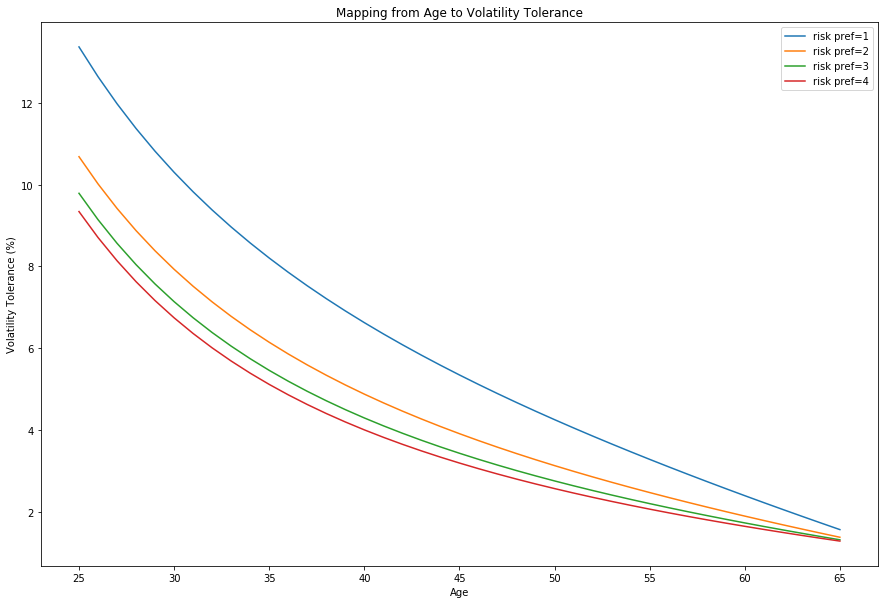

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(15,10))
for i in range(1,5):
    y = Age_Risk_Map(x, risk_pref=i)
    axs.plot(x, y, label='risk pref=' + str(i))
axs.set_xlabel('Age')
axs.set_ylabel('Volatility Tolerance (%)')
axs.set_title('Mapping from Age to Volatility Tolerance')
axs.legend()
plt.show()

## 2. Portfolio using Index as Instruments

### 2.1 Generating the price and return of each portfolios

In [9]:
# record the name of instruments we trade
IDX_col = {'tbill':'T-Bill', 'agg':'US AggIndex', 'russell':'Russell 1000'}

In [10]:
# calculate the value & return of differents portfolios
for i in range(1,10):
    w_equity = 0.1 * i
    lv = al.PortfolioPrices(IDX_price, w_equity, IDX_col, IDX_year)
    col_name = round(i/(10 - i), 2)
    IDX_price[col_name] = lv
    IDX_return[col_name] = IDX_price[col_name]/IDX_price[col_name].shift() - 1

In [11]:
IDX_return

,T-Bill,US AggIndex,S&P 500,Russell 1000,0.11,0.25,0.43,0.67,1.0,1.5,2.33,4.0,9.0
Date,,,,,,,,,,,,,
2010-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-26,0.000000,-0.000173,-0.004212,-0.004112,-0.000500,-0.000827,-0.001139,-0.001450,-0.001771,-0.002116,-0.002500,-0.002941,-0.003465
2010-01-27,0.000833,-0.000448,0.004880,0.004343,0.000298,0.000726,0.001117,0.001491,0.001864,0.002251,0.002669,0.003137,0.003682
2010-01-28,0.000000,-0.000147,-0.011818,-0.012134,-0.001231,-0.002236,-0.003188,-0.004132,-0.005105,-0.006148,-0.007303,-0.008627,-0.010198
2010-01-29,-0.000832,0.002449,-0.009829,-0.010453,0.000485,-0.000657,-0.001705,-0.002710,-0.003715,-0.004760,-0.005892,-0.007162,-0.008646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-16,-0.000739,-0.000558,0.008367,0.008441,0.000218,0.001117,0.002049,0.002980,0.003903,0.004819,0.005731,0.006639,0.007542
2020-01-17,0.000000,-0.000934,0.003862,0.003325,0.000103,0.000609,0.001000,0.001351,0.001688,0.002020,0.002350,0.002677,0.003002
2020-01-21,0.001479,0.003331,-0.002652,-0.002478,0.001537,0.000802,0.000298,-0.000130,-0.000533,-0.000928,-0.001320,-0.001709,-0.002095


### 2.2 Fitting the relation of Volatility ($\sigma$) v.s. Weights Ratio (r=Equity/Bonds) 

In [12]:
# 8 years data as training set, 2 years as test set
IDX_Train = IDX_return.iloc[:-514,4:]
IDX_Test = IDX_return.iloc[-514:,4:]

In [13]:
# annual std 
IDX_Train_AnnSTD = IDX_Train.std() * np.sqrt(250)
IDX_Test_AnnSTD = IDX_Test.std() * np.sqrt(250)

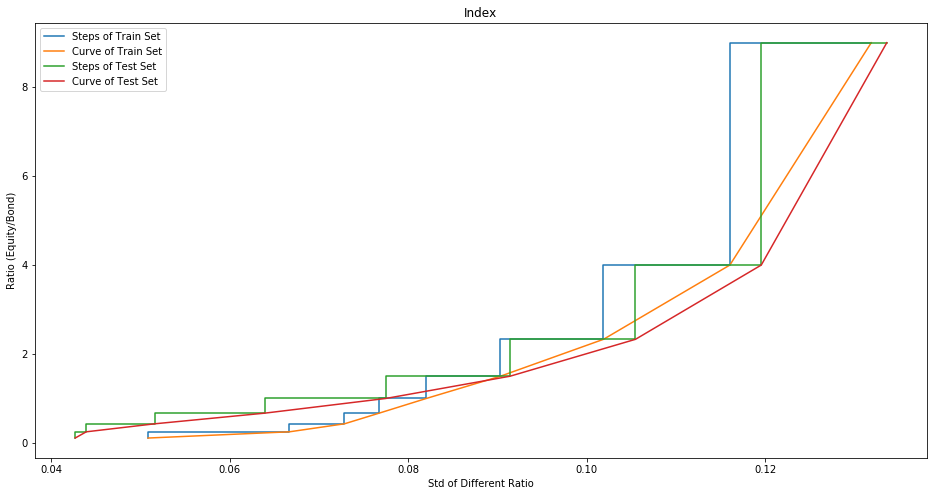

In [14]:
plt.figure(figsize=(16,8))

x_train = np.array(IDX_Train_AnnSTD.values)
y_train = np.array(IDX_Train_AnnSTD.index)

x_test = np.array(IDX_Test_AnnSTD.values)
y_test = np.array(IDX_Test_AnnSTD.index)

plt.plot(x_train, y_train, drawstyle='steps', label='Steps of Train Set')
plt.plot(x_train, y_train, label='Curve of Train Set')

plt.plot(x_test, y_test, drawstyle='steps', label='Steps of Test Set')
plt.plot(x_test, y_test, label='Curve of Test Set')

plt.legend()
plt.xlabel('Std of Different Ratio')
plt.ylabel('Ratio (Equity/Bond)')
plt.title('Index')
plt.show()

### 2.3 Performance Testing

Fixed Age = [25,35,45,55,65], Risk_Pref = [1,2,3,4] -> [Vol1,  Vol2, Vol3, Vol4] -> [Ratio1, Ratio2, Ratio3, Ratio4] -> Return graph on Test set.

In [15]:
IDX_Train_AnnSTD

0.11    0.050852
0.25    0.066701
0.43    0.072862
0.67    0.076753
1.00    0.082028
1.50    0.090326
2.33    0.101875
4.00    0.116031
9.00    0.131869
dtype: float64

In [16]:
IDX_STD_List = []

for a in [25,35,45,55,65]:
    IDX_STD_List.append([Age_Risk_Map(age=a, risk_pref=i, coef=8) for i in range(1,5)])

IDX_STD_Matrix = np.array(IDX_STD_List)/100

In [17]:
IDX_RATIO_Matrix = al.StdToRatio(IDX_Train_AnnSTD, IDX_STD_Matrix)
IDX_RATIO_Matrix = IDX_RATIO_Matrix.astype(int)

In [18]:
IDX_RATIO_Matrix

array([[8, 7, 6, 6],
       [5, 1, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

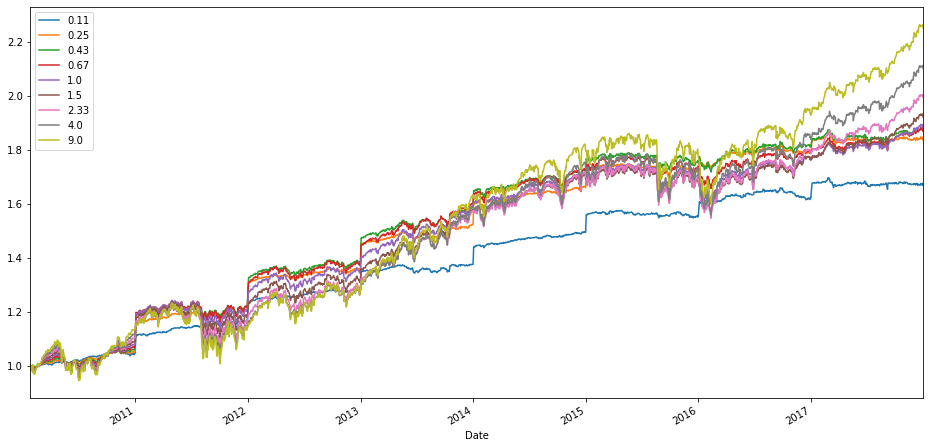

In [26]:
IDX_Train_return = IDX_Train + 1
IDX_Train_return = IDX_Train_return.cumprod()
IDX_Train_return.plot(figsize=(16,8))

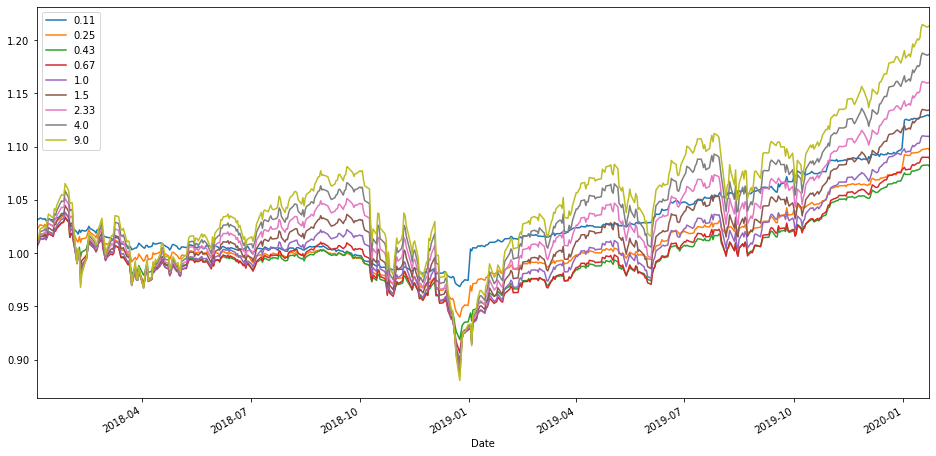

In [19]:
IDX_Test_return = IDX_Test + 1
IDX_Test_return = IDX_Test_return.cumprod()
IDX_Test_return.plot(figsize=(16,8))

In [20]:
def ReturnPlot(DF, ratio_lst):
    col_names = []
    col_idx = list(set(ratio_lst))
    for i in col_idx:
        col_names.append(DF.columns[i])
    DF_return = DF[col_names] + 1
    DF_return = DF_return.cumprod()
    DF_return.plot()

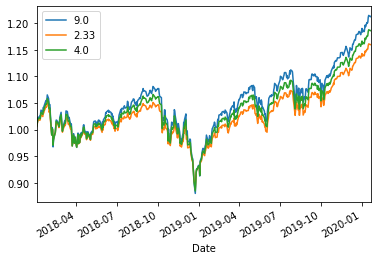

In [21]:
# Age = 25
ReturnPlot(IDX_Test, IDX_RATIO_Matrix[0])

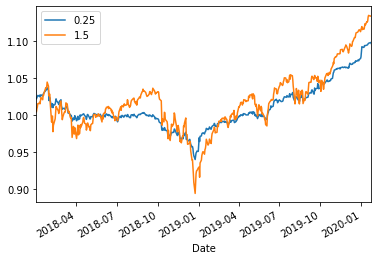

In [22]:
# Age = 35
ReturnPlot(IDX_Test, IDX_RATIO_Matrix[1])

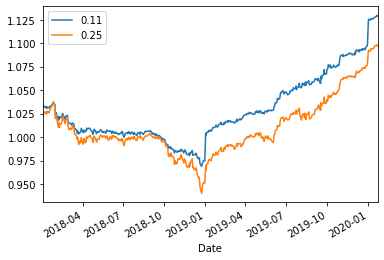

In [23]:
# Age = 45
ReturnPlot(IDX_Test, IDX_RATIO_Matrix[2])

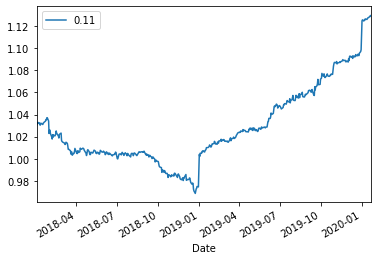

In [24]:
# Age = 55
ReturnPlot(IDX_Test, IDX_RATIO_Matrix[3])

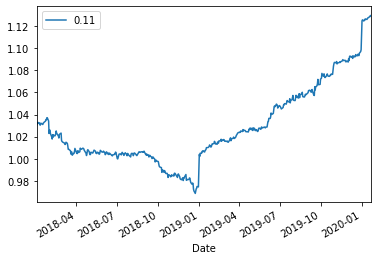

In [25]:
# Age = 65
ReturnPlot(IDX_Test, IDX_RATIO_Matrix[4])

### 3. Portfolio using ETFs as Instruments

In [45]:
# record the name of instruments we trade
ETF_col = {'tbill':'T-Bill ETF', 'agg':'US AggETF', 'russell':'Russell 1000 ETF'}

In [46]:
# calculate the value & return of differents portfolios
for i in range(1,10):
    w_equity = 0.1 * i
    lv = al.PortfolioPrices(ETF_price, w_equity, ETF_col, ETF_year)
    col_name = round(i/(10 - i), 2)
    ETF_price[col_name] = lv
    ETF_return[col_name] = ETF_price[col_name]/ETF_price[col_name].shift() - 1

In [47]:
ETF_return

,T-Bill ETF,US AggETF,Emerging Market ETF,Russell 1000 ETF,0.11,0.25,0.43,0.67,1.0,1.5,2.33,4.0,9.0
Date,,,,,,,,,,,,,
2011-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-27,0.000000,-0.001640,-0.020476,-0.021546,-0.003111,-0.004751,-0.006320,-0.007891,-0.009524,-0.011286,-0.013250,-0.015513,-0.018211
2011-07-28,0.000000,0.001344,-0.002910,-0.002890,0.000639,0.000261,-0.000084,-0.000412,-0.000738,-0.001075,-0.001438,-0.001844,-0.002316
2011-07-29,0.000000,0.000348,-0.006835,-0.006211,-0.000332,-0.000881,-0.001399,-0.001909,-0.002434,-0.002994,-0.003613,-0.004323,-0.005167
2011-08-01,0.000000,0.004672,-0.004253,-0.005000,0.002693,0.001801,0.001003,0.000257,-0.000469,-0.001204,-0.001982,-0.002837,-0.003819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-17,-0.000109,0.000000,0.003113,0.002778,0.000208,0.000480,0.000770,0.001063,0.001354,0.001642,0.001928,0.002213,0.002496
2020-01-21,0.000109,0.003257,-0.001958,-0.002010,0.000751,-0.000052,-0.000465,-0.000737,-0.000964,-0.001177,-0.001388,-0.001596,-0.001804
2020-01-22,0.000000,0.000496,0.000121,0.000490,0.000184,0.000140,0.000160,0.000201,0.000249,0.000297,0.000346,0.000394,0.000442


### 3.1 Generating the price and return of each portfolios

### 3.2 Fitting the relation of Volatility ($\sigma$) v.s. Weights Ratio (r=Equity/Bonds)